# __Brough Lecture Notes: Estimating VAR Models with R__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: April 23, 2019 <br>
<br>

In [3]:
options(warn=-1)

In [4]:
library(vars)

In [5]:
raw <- read.table("./data/lee-ready.csv", sep="|", header=T)
raw$SYMBOL <- as.character(raw$SYMBOL)
tickers <- unique(raw$SYMBOL)
ibm <- raw[raw$SYMBOL == "IBM", c("mid_point2", "buyer_init")]

In [6]:
head(ibm)

,mid_point2,buyer_init
15390,196.900,-1
15391,196.890,-1
15392,197.040,-1
15393,196.745,1
15394,197.395,-1
15395,196.965,-1


In [7]:
tail(ibm)

,mid_point2,buyer_init
22104,193.580,1
22105,193.585,-1
22106,193.605,-1
22107,193.510,-1
22108,193.565,-1
22109,193.570,-1


In [8]:
midRet <- diff(log(ibm$mid_point2))

In [9]:
n <- length(ibm$buyer_init)
trdSgn <- ibm$buyer_init[2:n]

In [10]:
df <- data.frame(X=trdSgn, R=midRet)

In [11]:
head(df)

X,R
-1,-5.078849e-05
-1,7.615567e-04
1,-1.498280e-03
-1,3.298323e-03
-1,-2.180749e-03
-1,-5.077173e-05


In [12]:
tail(df)

,X,R
6714,1,7.749035e-05
6715,-1,2.582878e-05
6716,-1,1.033085e-04
6717,-1,-4.908102e-04
6718,-1,2.841827e-04
6719,-1,2.583078e-05


In [14]:
help(VARselect)

VARselect {vars},R Documentation
y,Data item containing the endogenous variables
lag.max,Integer for the highest lag order (default is lag.max = 10).
type,Type of deterministic regressors to include.
season,Inlusion of centered seasonal dummy variables (integer value of frequency).
exogen,Inlusion of exogenous variables.
selection,Vector with the optimal lag number according to each criterium.
criteria,A matrix containing the values of the criteria up to lag.max.


In [15]:
fit <- VAR(df, p=3, type="const")

In [16]:
summary(fit)


VAR Estimation Results:
Endogenous variables: X, R 
Deterministic variables: const 
Sample size: 6716 
Log Likelihood: 12467.887 
Roots of the characteristic polynomial:
0.6397 0.6397 0.6016 0.5214 0.3046 0.3046
Call:
VAR(y = df, p = 3, type = "const")


Estimation results for equation X: 
X = X.l1 + R.l1 + X.l2 + R.l2 + X.l3 + R.l3 + const 

       Estimate Std. Error t value Pr(>|t|)    
X.l1   0.212894   0.012197  17.454  < 2e-16 ***
R.l1   1.310851   1.210319   1.083    0.279    
X.l2   0.067837   0.012441   5.453 5.14e-08 ***
R.l2   1.944893   1.397705   1.391    0.164    
X.l3   0.048484   0.012194   3.976 7.08e-05 ***
R.l3  -0.657241   1.210400  -0.543    0.587    
const -0.007882   0.011811  -0.667    0.505    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9678 on 6709 degrees of freedom
Multiple R-Squared: 0.06364,	Adjusted R-squared: 0.0628 
F-statistic:    76 on 6 and 6709 DF,  p-value: < 2.2e-16 


Estimation results for eq

In [22]:
args(irf)

function (x, impulse = NULL, response = NULL, n.ahead = 10, ortho = TRUE, 
    cumulative = FALSE, boot = TRUE, ci = 0.95, runs = 100, seed = NULL, 
    ...) 
NULL

In [17]:
data(Canada)

In [18]:
args(VARselect)

function (y, lag.max = 10, type = c("const", "trend", "both", 
    "none"), season = NULL, exogen = NULL) 
NULL

In [19]:
VARselect(Canada, type="const")

,1,2,3,4,5,6,7,8,9,10
AIC(n),-6.191599834,-6.621627919,-6.709002047,-6.512701777,-6.30174681,-6.194596715,-6.011720944,-6.054479536,-5.912126222,-5.867271844
HQ(n),-5.943189052,-6.174488511,-6.063134014,-5.668105118,-5.25842152,-4.952542805,-4.570938409,-4.414968375,-4.073886435,-3.830303432
SC(n),-5.568879538,-5.500731387,-5.089929279,-4.395452772,-3.68632157,-3.080995238,-2.399943231,-1.944525586,-1.303996035,-0.760965421
FPE(n),0.002048239,0.001337721,0.001237985,0.001534875,0.00195439,0.002278812,0.002924622,0.003073249,0.004015164,0.004961704


In [20]:
fit1 <- VAR(Canada, p=3, type="const")

In [22]:
summary(fit1)


VAR Estimation Results:
Endogenous variables: e, prod, rw, U 
Deterministic variables: const 
Sample size: 81 
Log Likelihood: -150.609 
Roots of the characteristic polynomial:
1.004 0.9283 0.9283 0.7437 0.7437 0.6043 0.6043 0.5355 0.5355 0.2258 0.2258 0.1607
Call:
VAR(y = Canada, p = 3, type = "const")


Estimation results for equation e: 
e = e.l1 + prod.l1 + rw.l1 + U.l1 + e.l2 + prod.l2 + rw.l2 + U.l2 + e.l3 + prod.l3 + rw.l3 + U.l3 + const 

          Estimate Std. Error t value Pr(>|t|)    
e.l1       1.75274    0.15082  11.622  < 2e-16 ***
prod.l1    0.16962    0.06228   2.723 0.008204 ** 
rw.l1     -0.08260    0.05277  -1.565 0.122180    
U.l1       0.09952    0.19747   0.504 0.615915    
e.l2      -1.18385    0.23517  -5.034 3.75e-06 ***
prod.l2   -0.10574    0.09425  -1.122 0.265858    
rw.l2     -0.02439    0.06957  -0.351 0.727032    
U.l2      -0.05077    0.24534  -0.207 0.836667    
e.l3       0.58725    0.16431   3.574 0.000652 ***
prod.l3    0.01054    0.06384   0.165 

In [23]:
help(irf)

irf {vars},R Documentation
x,"Object of class ‘varest’; generated by VAR(), or object of class ‘svarest’; generated by SVAR(), or object of class ‘vec2var’; generated by vec2var(), or object of class ‘svecest’; generated by SVEC()."
impulse,"A character vector of the impulses, default is all variables."
response,"A character vector of the responses, default is all variables."
n.ahead,Integer specifying the steps.
ortho,"Logical, if TRUE (the default) the orthogonalised impulse response coefficients are computed (only for objects of class ‘varest’)."
cumulative,"Logical, if TRUE the cumulated impulse response coefficients are computed. The default value is false."
boot,"Logical, if TRUE (the default) bootstrapped error bands for the imuplse response coefficients are computed."
ci,"Numeric, the confidence interval for the bootstrapped errors bands."
runs,"An integer, specifying the runs for the bootstrap."
seed,"An integer, specifying the seed for the rng of the bootstrap."


In [25]:
help(Canada)

Canada                  package:vars                   R Documentation

_C_a_n_a_d_a: _M_a_c_r_o_e_c_o_n_o_m_i_c _t_i_m_e _s_e_r_i_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     The original time series are published by the OECD. The sample
     range is from the 1stQ 1980 until 4thQ 2000. The following series
     have been utilised in the construction of the series provided in
     ‘Canada’:
     _Main Economic Indicators:_

       Canadian unemployment rate in %   444113DSA 
       Canadian manufacturing real wage  444321KSA 
       Canadian consumer price index     445241K   
      
     _Quarterly National Accounts:_

       Canadian nominal GDP  CAN1008S1 
      
     _Labour Force Statistics:_

       Canadian civil employment in 1000 persons  445005DSA 
      
     The series in ‘Canada’ are constructed as:

       ‘prod’ :=  100*(ln(CAN1008S1/445241K)-ln(445005DSA)) 
          ‘e’ :=  100*ln(445005DSA)                         
          ‘U’ :=  444113DSA                                 
         ‘rw’ :=  100*ln(100*444321KSA)                     
      
     Hence, ‘prod’ is used as a measure of labour productivity; ‘e’ is
     used for employment; ‘U’ is the unemployment rate and ‘rw’ assigns
     the real wage.

_U_s_a_g_e:

     Canada
     
_F_o_r_m_a_t:

     An object with class attributes ‘mts’ and ‘ts’ containing four
     variables with 84 observations.

_S_o_u_r_c_e:

     OECD: <URL: http://www.oecd.org>; data set is available for
     download at <URL: http://www.jmulti.org/data_atse.html>, the
     official homepage of JMULTI is <URL: www.jmulti.com>.

In [27]:
bob <- irf(fit1, impulse="e", response="prod")

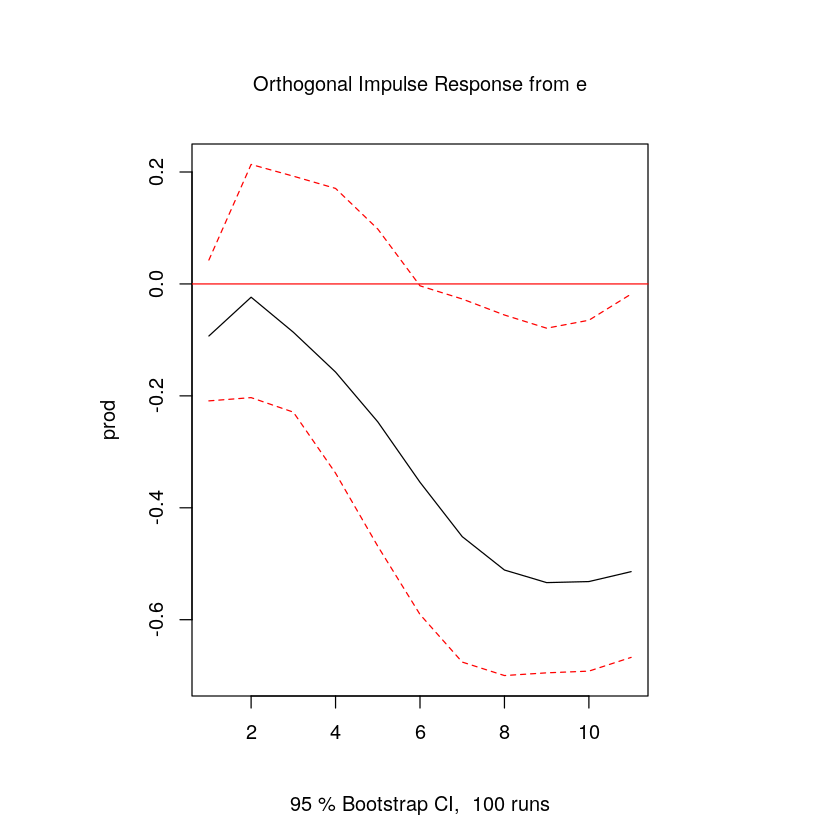

In [28]:
plot(bob)